# IMPORTS

In [2]:
# import request library 
import requests
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
import datetime

## GET API DATA

In [3]:
GET = "/archives_json"
URL =  "https://api.esios.ree.es"


HEADERS = {
    'Accept' : 'application/json',
    'Host': 'api.esios.ree.es',
    'Authorization': 'Token token=\"6b8f5a5cf5cdb176a7214275733e706786a1457ef5a86e4814b68f9c439c1501"',
    'Content-Type' : 'application/json'
}
PARAMS = {'date' : '20201104'}

response = requests.get(url = URL+GET, headers = HEADERS, params = PARAMS)
data = response.json()

In [4]:
status = response.status_code

#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


## FUNCTIONS SETUP

In [5]:
# Get PVPC_CURV_DD data
def return_id(data):
    for element in data['archives']:
        if element['name'] == 'PVPC_CURV_DD':
            return element['id']

In [6]:
date_today = datetime.date.today()                # use todays prices
date = date_today + datetime.timedelta(days=2)    # open to use tomorrows prices
dateend = datetime.date.today()            # use to specify a date
#dateend = date                              # to use only one day

### Tomorrows prices can only be requested after 20:15 the day before. ###

startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+'2019-10-12T00:00:00.00'+'&end_date='+'2019-10-13T00:00:00.00'

     
     
#print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': 'Token token=\"6b8f5a5cf5cdb176a7214275733e706786a1457ef5a86e4814b68f9c439c1501"',
            'Content-Type': 'application/json'}
PARAMS = {'date': 20201104}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS)#, params = PARAMS)

# Read the status code
status = response.status_code

In [ ]:
# Diving into the data:
marketlist = []
for stuff in response.json()["indicator"]['values']:
    #print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
    #print(stuff['value'])
        marketlist.append(stuff['value'])

        
print('\n')
print(f"List of market prices for day 2019-10-12 in €/MWh:")        
print(marketlist)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for 2019-10-12")
plt.xlim(0,24)
plt.ylim(0,50)
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show()

In [7]:
date_today = datetime.date.today()                # use todays prices
# date_today = datetime.date(2020, 11, 1)
date = date_today + datetime.timedelta(days=1)    # open to use tomorrows prices
#dateend = datetime.date.today()            # use to specify a date
dateend = date                              # to use only one day


### Tomorrows prices can only be requested after 20:15 the day before. ###

startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+startdate+'&end_date='+enddate
     
     
print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': "Token token=\"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81",#"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81"',
            'Content-Type': 'application/json'}
#PARAMS = {'date':date}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS)#, params = PARAMS)

# Read the status code
status = response.status_code

Checking dates:  2020-11-19T00:00:00.00 to 2020-11-20T23:50:00.00




List of market prices for day 2020-11-20 in €/MWh:
[40.95, 38.0, 36.55, 36.15, 32.4, 32.02, 33.4, 41.7, 42.16, 42.39, 39.05, 37.55, 37.51, 35.97, 35.27, 36.55, 37.31, 42.16, 47.56, 48.11, 45.15, 42.22, 39.95, 37.83, 36.9, 34.81, 32.61, 32.41, 31.64, 32.61, 36.2, 42.97, 45.76, 44.94, 43.92, 42.67, 42.67, 43.49, 42.8, 42.95, 43.05, 46.87, 49.37, 49.0, 48.18, 45.14, 42.22, 38.05]


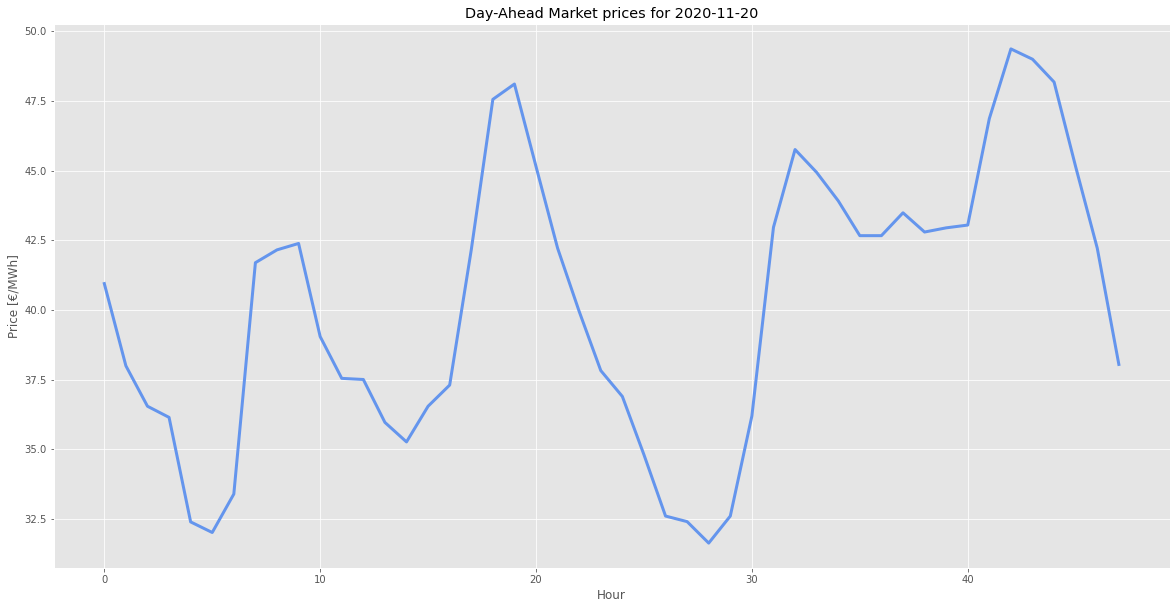

In [8]:
# Diving into the data:
marketlist = []
for stuff in response.json()["indicator"]['values']:
    #print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
    #print(stuff['value'])
        marketlist.append(stuff['value'])

        
print('\n')
print(f"List of market prices for day {date} in €/MWh:")        
print(marketlist)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for {date}")
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show()

In [ ]:
len(marketlist)

